100 data, 14 days, aspects of the data
movie, product, service 
no need visual cause will be too many

we need to find polarity and subjectivity values only (polarity refers to sentiment) if polarity= -ve, sentiment = -ve
textblob - got 2 columns polarity and subjectivity
see how many +ve and -ve, plot graph - who +ve or -ve, why and which aspect ppl like the most

In [ ]:
!pip install aiohttp==3.7.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
import twint
import nest_asyncio
nest_asyncio.apply()

import pandas 

fatal: destination path 'twint' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38871 sha256=8b6e42a2df2243bf5440fc273463ab856ca16f4b0fbfb89f77ac7ed9d1116561
  Stored in directory: /tmp/pip-ephem-wheel-cache-0wzq2vad/wheels/f7/3e/11/2803f3c6890e87a9bec35bb8e37ef1ad0777a00f43e2441fb1
Successfully built twint
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.

In [ ]:
c = twint.Config()
c.Search = "lang:en Jurassic World"
c.Lang = "en"
c.Pandas = True
c.Since = "2022-06-09"
c.Until = "2022-06-23"
c.Limit = 100
c.Store_csv = True
c.Output = "./" + "data.csv"
twint.run.Search(c)
    
df = twint.storage.panda.Tweets_df
df.head()


1539760108762083328 2022-06-22 23:59:51 +0000 <Anthony14484806> @hexadonia Have you seen the new jurassic world movie
1539760092295438336 2022-06-22 23:59:48 +0000 <fallova> @JurassicWorld You guys better turn it into a TV series:)  There's so much more story to make.
1539759194487808003 2022-06-22 23:56:13 +0000 <ygnyghtstorm> FATHER &amp; SONS DAY: THANK YOU to my sons for treating me to drinks, seeing the Jurassic World Dominion movie and a delicious steak from Longhorn. I’m so PROUD of the strong men they have become and having adult children is so much fun! #FatherhoodRocks  https://t.co/YkgJsg5aVI
1539759165425553408 2022-06-22 23:56:07 +0000 <JurassicSouls> What’s your favorite part of Jurassic World Fallen Kingdom !?💕🦖  https://t.co/VurL59J3VI
1539759115068616704 2022-06-22 23:55:55 +0000 <BrynammanCinema> @yourlocalcinema Yes we do! Our next one is of Jurassic World:Dominion on Tuesday, 28/6, at 7:30pm 🦕 we try to have at least one subtitled screening on each film that we scre

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1539760108762083328,1537930599020736514,1.655942e+12,2022-06-22 23:59:51,+0000,,@hexadonia Have you seen the new jurassic worl...,en,[],[],...,,,,,,"[{'screen_name': 'hexadonia', 'name': 'Hexadon...",,,,
1,1539760092295438336,1539755557040492544,1.655942e+12,2022-06-22 23:59:48,+0000,,@JurassicWorld You guys better turn it into a ...,en,[],[],...,,,,,,"[{'screen_name': 'JurassicWorld', 'name': 'Jur...",,,,
2,1539759194487808003,1539759194487808003,1.655942e+12,2022-06-22 23:56:13,+0000,,FATHER &amp; SONS DAY: THANK YOU to my sons fo...,en,[fatherhoodrocks],[],...,,,,,,[],,,,
3,1539759165425553408,1539759165425553408,1.655942e+12,2022-06-22 23:56:07,+0000,,What’s your favorite part of Jurassic World Fa...,en,[],[],...,,,,,,[],,,,
4,1539759115068616704,1539330549604548608,1.655942e+12,2022-06-22 23:55:55,+0000,,@yourlocalcinema Yes we do! Our next one is of...,en,[],[],...,,,,,,"[{'screen_name': 'yourlocalcinema', 'name': 'Y...",,,,


In [ ]:
# drop duplicates
df = df.drop_duplicates(['tweet'])
# preview
df = df[['date','username','tweet']]
df.head()

,date,username,tweet
0,2022-06-22 23:59:51,Anthony14484806,@hexadonia Have you seen the new jurassic worl...
1,2022-06-22 23:59:48,fallova,@JurassicWorld You guys better turn it into a ...
2,2022-06-22 23:56:13,ygnyghtstorm,FATHER &amp; SONS DAY: THANK YOU to my sons fo...
3,2022-06-22 23:56:07,JurassicSouls,What’s your favorite part of Jurassic World Fa...
4,2022-06-22 23:55:55,BrynammanCinema,@yourlocalcinema Yes we do! Our next one is of...


In [ ]:
import re

# create a function to clean the tweets
def cleanTweets(text):
  text = re.sub(r'@[A-Za-z0–9]+','', text) #remove the mentions
  text = re.sub(r'#','', text) # remove the #
  text = re.sub(r'RT[\s]+','', text) # remove the RT
  text = re.sub(r'https?:\/\/\S+','', text) #remove hyperlink
  return text
  
# apply the function
df['tweet'] = df['tweet'].apply(cleanTweets)


In [ ]:
from textblob import TextBlob

#create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
  
#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
# create new columns
df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

# filter df for these columns
df = df[['tweet','Subjectivity','Polarity']]
df

,tweet,Subjectivity,Polarity
0,Have you seen the new jurassic world movie,0.454545,0.136364
1,You guys better turn it into a TV series:) T...,0.666667,0.500000
2,FATHER &amp; SONS DAY: THANK YOU to my sons fo...,0.646667,0.541667
3,What’s your favorite part of Jurassic World Fa...,1.000000,0.625000
4,Yes we do! Our next one is of Jurassic World:...,0.200000,-0.150000
...,...,...,...
95,after watching 1 response videos to Doug Walke...,0.000000,0.000000
96,"Yeah, we in Australia got it late too...",0.600000,-0.300000
97,That moment that people warned you about Juras...,0.000000,0.000000
98,Maybe I’ll go see Jurassic World Dominion sinc...,0.683333,-0.100000


In [ ]:
# create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] =df['Polarity'].apply(getAnalysis)

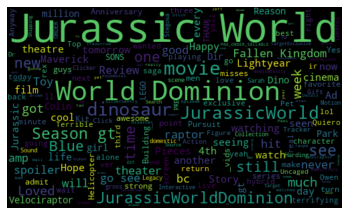

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a word cloud.
allWords = ' '.join( [tweets for tweets in df['tweet']])
wordCloud = WordCloud(width = 500, height = 300, random_state=42, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [ ]:
#filter the df for any tweets that were Positive or Negative and store in a new df called df1
df1 = df.loc[df['Analysis'].isin(['Positive','Negative'])]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


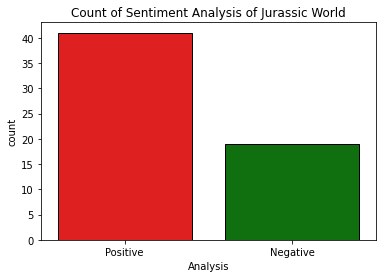

In [ ]:
# Plot the counts of both field
import seaborn as sns

colors = ['red','green']
sns.countplot(df1['Analysis'],palette=sns.color_palette(colors),edgecolor='black')
plt.title('Count of Sentiment Analysis of Jurassic World')
plt.show()

In [ ]:
print("The number of Positive tweets about Jurassic World is:", len(df[df['Analysis'].str.contains('Positive')]))
print("The number of Negative tweets about Jurassic World is:", len(df[df['Analysis'].str.contains('Negative')]))
print("The number of Neutral tweets about Jurassic World is:", len(df[df['Analysis'].str.contains('Neutral')]))

The number of Positive tweets about Jurassic World is: 41
The number of Negative tweets about Jurassic World is: 19
The number of Neutral tweets about Jurassic World is: 40
